# French Bakery Analysis
## Authored by Trinity Gahagen
#### Phase 2 Project for Flatiron School
---
---

## Data Overview

*Dataset Kaggle Page*: https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales

From the Kaggle page, the description of the dataset itself and the variables within it are as follows:
>#### **About Dataset**
>
> **Context**
>
>The dataset belongs to a French bakery. The dataset provides the daily transaction details of customers from 2021-01-01 to 2022-09-30.
>Yearly and weekly saisonalities can be observed.
>
>**Content**
>
>The dataset has 234005 entries, over 136000 transactions and 6 columns.
>
>**Variables**
>
>`date`: date order
>
>`time`: time order
>
>`ticket number`: identifier for every single transaction
>
>`article`: name of the product sold (in French)
>
>`quantity`: quantity sold
>
>`unit_price`: price per product
>
>**Miscellaneous**
>
>The product COUPE is when customers ask to slice (with a machine) their whole bread.
>
>

## Objective
In this analysis, we will be exploring orders across the different dates and times provided to gain insights on customer preference, busyness during different times of the day/year, and how much revenue the bakery generates.

To kick off this project, we will import the necessary modules, read in the dataset, and look at the dataset for cleaning/preprocessing.

In [76]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
from datetime import timedelta

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 13
plt.style.use('seaborn-v0_8-darkgrid')

In [77]:
bakery = pd.read_csv('Bakery sales.csv', parse_dates=['date'])

In [78]:
bakery.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


## Data Cleaning/Feature Engineering and Exploration
---

In [79]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   article        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.5+ MB


In [80]:
bakery.describe()

,Unnamed: 0,date,ticket_number,Quantity
count,234005.000000,234005,234005.000000,234005.000000
mean,255205.035854,2021-11-30 11:33:31.049336576,219201.258738,1.538377
min,0.000000,2021-01-02 00:00:00,150040.000000,-200.000000
25%,127979.000000,2021-07-03 00:00:00,184754.000000,1.000000
50%,254573.000000,2021-11-04 00:00:00,218807.000000,1.000000
75%,382911.000000,2022-05-31 00:00:00,253927.000000,2.000000
max,511395.000000,2022-09-30 00:00:00,288913.000000,200.000000
std,147501.625992,NaN,40053.223896,1.289603


In [81]:
bakery.describe(include="O")

,time,article,unit_price
count,234005,234005,234005
unique,683,149,123
top,11:43,TRADITIONAL BAGUETTE,"1,20 €"
freq,859,67689,49080


In [82]:
bakery['Unnamed: 0'].head()

0    0
1    1
2    4
3    5
4    8
Name: Unnamed: 0, dtype: int64

In [83]:
bakery['Quantity'] = bakery['Quantity'].astype(int)
bakery['ticket_number'] = bakery['ticket_number'].astype(int)

In [84]:
# Unnamed doesn't seem like a useful column, so we'll just drop it
try:
    bakery.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("Column already dropped")

In [85]:
# Clean unit_price column
bakery['unit_price_clean'] = bakery['unit_price'].str.extract("(\d+,\d+)")
bakery['unit_price_clean'] = bakery['unit_price_clean'].str.replace(",", ".").astype(float)
bakery[['unit_price', 'unit_price_clean']].head()

,unit_price,unit_price_clean
0,"0,90 €",0.90
1,"1,20 €",1.20
2,"1,20 €",1.20
3,"1,15 €",1.15
4,"1,20 €",1.20


In [86]:
# Convert to USD
EURO_TO_DOLLAR = 1.08 # 1 Euro = 1.08 USD

bakery['unit_price_usd'] = round(bakery['unit_price_clean'] * EURO_TO_DOLLAR, 2)
bakery['unit_price_usd'].head()

0    0.97
1    1.30
2    1.30
3    1.24
4    1.30
Name: unit_price_usd, dtype: float64

In [87]:
bakery['ticket_number'].nunique()

136451

In [88]:
bakery['total_spent_on_quantity'] = round(bakery['unit_price_usd'] * bakery['Quantity'], 2)
bakery['total_spent_on_quantity'].head()

0    0.97
1    3.90
2    2.60
3    1.24
4    6.50
Name: total_spent_on_quantity, dtype: float64

In [89]:
print(bakery['article'].nunique())
display(bakery['article'].unique())

149


array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [90]:
PERIOD_ARTICLES = bakery['article'] == '.'
bakery[PERIOD_ARTICLES]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
15360,2021-03-04,12:32,159219,.,2,"0,00 €",0.0,0.0,0.0
19904,2021-03-18,12:59,161853,.,1,"0,00 €",0.0,0.0,0.0
24959,2021-04-04,09:53,164878,.,1,"0,00 €",0.0,0.0,0.0
33569,2021-04-27,16:48,170079,.,1,"0,00 €",0.0,0.0,0.0
61792,2021-07-10,13:25,186662,.,2,"0,00 €",0.0,0.0,0.0


In [91]:
# Drop articles that just have period, since there's no price associated with them
if len(bakery[PERIOD_ARTICLES]) > 0:
    bakery.drop(bakery[PERIOD_ARTICLES].index, inplace=True)
else:
    print("Already dropped")

### Negative Quantities: What to do?

In [92]:
# There are negative quantities
bakery.loc[bakery['Quantity'] < 0]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
448,2021-01-03,10:41,150265,BAGUETTE,-1,"0,90 €",0.90,0.97,-0.97
1162,2021-01-05,19:00,150738,SPECIAL BREAD,-1,"2,40 €",2.40,2.59,-2.59
1163,2021-01-05,19:00,150738,DIVERS PATISSERIE,-1,"6,00 €",6.00,6.48,-6.48
1164,2021-01-05,19:00,150738,DIVERS BOULANGERIE,-1,"2,00 €",2.00,2.16,-2.16
1467,2021-01-08,11:58,150941,COUPE,-1,"0,15 €",0.15,0.16,-0.16
...,...,...,...,...,...,...,...,...,...
233054,2022-09-27,18:03,288312,COUPE,-2,"0,15 €",0.15,0.16,-0.32
233055,2022-09-27,18:03,288312,TRADITIONAL BAGUETTE,-1,"1,30 €",1.30,1.40,-1.40
233056,2022-09-27,18:03,288312,CEREAL BAGUETTE,-3,"1,35 €",1.35,1.46,-4.38
233553,2022-09-29,11:55,288639,BOISSON 33CL,-1,"1,50 €",1.50,1.62,-1.62


Here we see that there are negative quantities included in this dataset. From the Kaggle page, the owner of the dataset commented on this, saying:
>Sorry for the delay. Negative quantities might be due to till errors (the huge -200) or refunds


In [93]:
# Find all ticket numbers with negative values, assign to dataframe negative_groups
negative_groups = bakery.groupby('ticket_number', as_index=False)['Quantity'].sum()
negative_groups = negative_groups[negative_groups['Quantity'] < 0]

# Find all tickets immediately prior to ticket numbers with negative values that have ticket numbers that are positive
# Assign to dataframe potential_cancel_tickets
condition = (bakery['ticket_number'].isin(negative_groups['ticket_number'] - 1)) & (bakery['Quantity'].isin(abs(negative_groups['Quantity'])))
potential_cancel_tickets = bakery.loc[condition, ['ticket_number', 'Quantity']]
potential_cancel_tickets = potential_cancel_tickets.groupby('ticket_number', as_index=False)['Quantity'].sum()

# Make ticket numbers the same so we can join the two dataframes together
potential_cancel_tickets['ticket_number'] = potential_cancel_tickets['ticket_number'] + 1

# Join two dataframes so we can see how many of them cancel out
combined = pd.merge(negative_groups, potential_cancel_tickets, how='left', on='ticket_number')

# Create a column that indicates the two quantities sum to 0
combined['cancels'] = combined['Quantity_x'] + combined['Quantity_y'] == 0

# Print proportion of (negative tickets + cancel-out tickets) to total negative tickets
print(len(combined.loc[combined['cancels'] == True]) / len(combined))

0.9308996088657105


In [94]:
combined.isna().sum()

ticket_number     0
Quantity_x        0
Quantity_y       10
cancels           0
dtype: int64

Because 93% of all the negative values have a value immediately preceding it that cancels it out, it is reasonable to believe that most of the negative values are refunds, or corrections to tickets that contained mistakes. We will not remove them due to the fact that they are still transactions, and that dropping them will not accurately represent the revenue of the bakery.

Now, we will start dealing with the date and time columns.

In [95]:
# Separating time increments into separate columns for future grouping
bakery['month'] = bakery['date'].dt.month
bakery['year'] = bakery['date'].dt.year
bakery['day_of_week'] = bakery['date'].dt.day_of_week


DAY_DICT = {
    0 : "Mon",
    1 : "Tues",
    2 : "Wed",
    3 : "Thurs",
    4 : "Fri",
    5 : "Sat",
    6 : "Sun"
}

MONTH_DICT = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "May",
    6 : "Jun",
    7 : "Jul",
    8 : "Aug",
    9 : "Sep",
    10 : "Oct",
    11 : "Nov",
    12 : "Dec"
}

# Replace numbers with names according to the respective dictionaries 
bakery['month'].replace(MONTH_DICT, inplace=True)
bakery['day_of_week'].replace(DAY_DICT, inplace=True)

bakery.head()


,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity,month,year,day_of_week
0,2021-01-02,08:38,150040,BAGUETTE,1,"0,90 €",0.90,0.97,0.97,Jan,2021,Sat
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,"1,20 €",1.20,1.30,3.90,Jan,2021,Sat
2,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,"1,20 €",1.20,1.30,2.60,Jan,2021,Sat
3,2021-01-02,09:14,150041,PAIN,1,"1,15 €",1.15,1.24,1.24,Jan,2021,Sat
4,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €",1.20,1.30,6.50,Jan,2021,Sat


In [96]:
# Drop unnecessary columns
try:
    bakery.drop(columns=['unit_price', 'unit_price_clean'], inplace=True)
except:
    print("Columns already dropped")

In [97]:
# Convert time column to datetime so that there is an easier way to create an hour column
bakery['time_dt'] = bakery['date'].dt.strftime("%Y-%m-%d") + " " + bakery['time']
bakery['time_dt'] = pd.to_datetime(bakery['time_dt'])

In [98]:
bakery['time_dt'].head()

0   2021-01-02 08:38:00
1   2021-01-02 08:38:00
2   2021-01-02 09:14:00
3   2021-01-02 09:14:00
4   2021-01-02 09:25:00
Name: time_dt, dtype: datetime64[ns]

In [99]:
bakery['hour'] = bakery['time_dt'].dt.hour
bakery['hour'].head()

0    8
1    8
2    9
3    9
4    9
Name: hour, dtype: int32

In [100]:
# Create a day of the month column just in case
bakery['day_of_month'] = bakery['date'].dt.day

In [101]:
# Format the strings in the article column to be more readable, i.e. titlecase rather than all uppercase
bakery['article'] = bakery['article'].str.title()

In [102]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234000 entries, 0 to 234004
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     234000 non-null  datetime64[ns]
 1   time                     234000 non-null  object        
 2   ticket_number            234000 non-null  int32         
 3   article                  234000 non-null  object        
 4   Quantity                 234000 non-null  int32         
 5   unit_price_usd           234000 non-null  float64       
 6   total_spent_on_quantity  234000 non-null  float64       
 7   month                    234000 non-null  object        
 8   year                     234000 non-null  int32         
 9   day_of_week              234000 non-null  object        
 10  time_dt                  234000 non-null  datetime64[ns]
 11  hour                     234000 non-null  int32         
 12  day_of_month         

In [103]:
# Reorder columns
bakery = bakery[['time_dt',
                 'date',
                 'time',
                 'hour',
                 'year',
                 'month',
                 'day_of_month',
                 'day_of_week',
                 'ticket_number',
                 'article',
                 'Quantity',
                 'unit_price_usd',
                 'total_spent_on_quantity']]
bakery.columns

Index(['time_dt', 'date', 'time', 'hour', 'year', 'month', 'day_of_month',
       'day_of_week', 'ticket_number', 'article', 'Quantity', 'unit_price_usd',
       'total_spent_on_quantity'],
      dtype='object')

## Descriptive Analysis
---
Here we will dive into the descriptive analysis questions.

#### What is the daily revenue of the bakery over time?

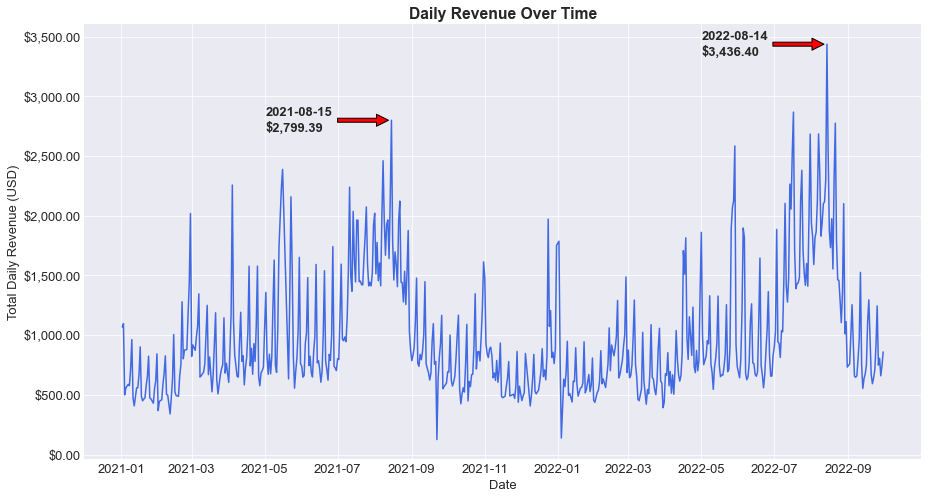

In [104]:
# Group the data by each day and sum up the total revenue
data = bakery.groupby('date')['total_spent_on_quantity'].sum()

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data.index, data, color='royalblue')
ax.set_xlabel('Date')
ax.set_ylabel('Total Daily Revenue (USD)')
ax.set_title('Daily Revenue Over Time')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)))

# Find the local maxima
maxes = data.sort_values(ascending=False)[0:3]
max_2022_date, max_2022_value = maxes.index[0], maxes[0]
max_2021_date, max_2021_value = maxes.index[2], maxes[2]

delta = timedelta(weeks=15)
ax.annotate(max_2022_date.strftime('%Y-%m-%d') + f'\n${max_2022_value:,.02f}',
            xy=(max_2022_date, max_2022_value),
            xycoords='data',
            xytext=(max_2022_date - delta, max_2022_value),
            va='center',
            ha='left',
            fontweight='bold',
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate(max_2021_date.strftime('%Y-%m-%d') + f'\n${max_2021_value:,.02f}',
            xy=(max_2021_date, max_2021_value),
            xycoords='data',
            xytext=(max_2021_date - delta, max_2021_value),
            va='center',
            ha='left',
            fontweight='bold',
            arrowprops=dict(facecolor='red', shrink=0.05));

The daily revenue fluctuates heavily from day to day, as well as from month to month, but seems to follow a baseline trend of centering around $1,000 a day.

It appears that there are large spikes in revenue in between July and September both years, with the highest points being on or around August 14th and 15th!

#### What is the frequency of orders over time on a given day?

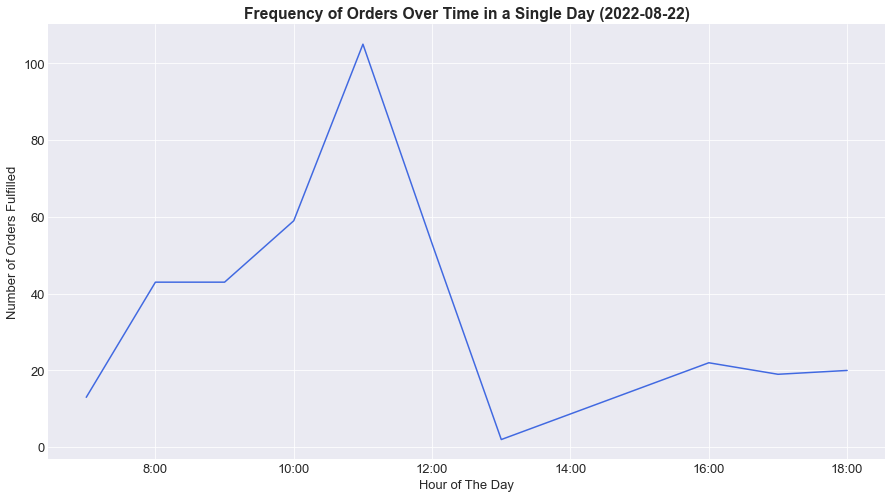

In [105]:
# Pick a random day out of the entire dataset
random_day = bakery['date'].sample(n=1, random_state=42).iloc[0]

# Subset the data to only transactions on this date
random_day_df = bakery.loc[bakery['date'] == random_day]

# Count number of tickets per hour on this day
data = random_day_df.groupby('hour')['ticket_number'].nunique()

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data.index, data, color='royalblue')
ax.set_xlabel('Hour of The Day')
ax.set_ylabel('Number of Orders Fulfilled')
ax.set_title('Frequency of Orders Over Time in a Single Day (' +  random_day.strftime('%Y-%m-%d') + ')')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}:00'))

#### What about the frequency of orders over time across multiple days?

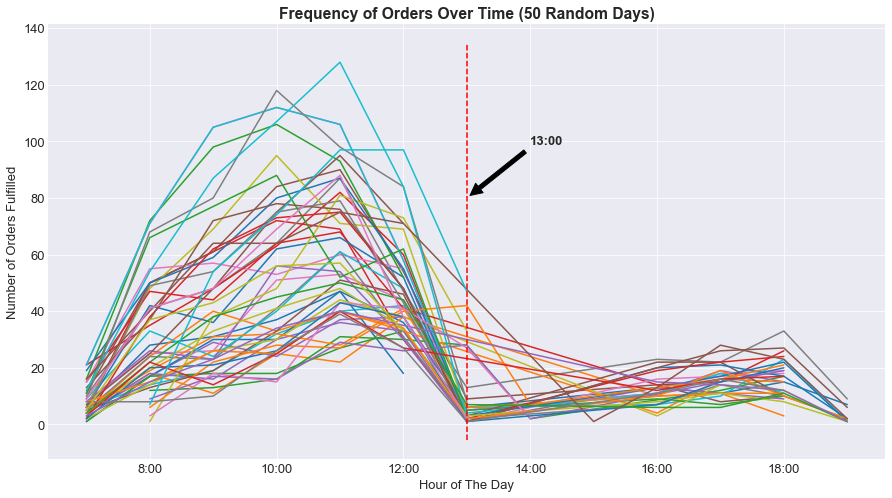

In [106]:
fig, ax = plt.subplots(figsize=(15, 8))
color_map = sns.color_palette('tab10')

# Here, we repeat the same process as before, but this time plotting 50 random days instead of just one 
for i in range(50):
    random_day = bakery['date'].sample(n=1).iloc[0]

    random_day_df = bakery.loc[bakery['date'] == random_day]
    data = random_day_df.groupby('hour')['ticket_number'].nunique()

    ax.plot(data.index, data, color=color_map[i % 10])

ax.vlines(x=13, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='red', ls='--')
ax.annotate(text='13:00',
            xy=(13, 80),
            xytext=(14, 100),
            xycoords='data',
            va='center',
            ha='left',
            fontweight = 'bold',
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('Hour of The Day')
ax.set_ylabel('Number of Orders Fulfilled')
ax.set_title('Frequency of Orders Over Time (50 Random Days)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}:00'))

Most days in this seem to follow the trend of being busy in the mornings and early afternoons, with frequency of orders decreasing dramatically at about 1pm.

#### Which months generate the most revenue?

Because the data only spans from January of 2021 to September of 2022, we will compare the revenues of each month in 2021 and 2022 separately.

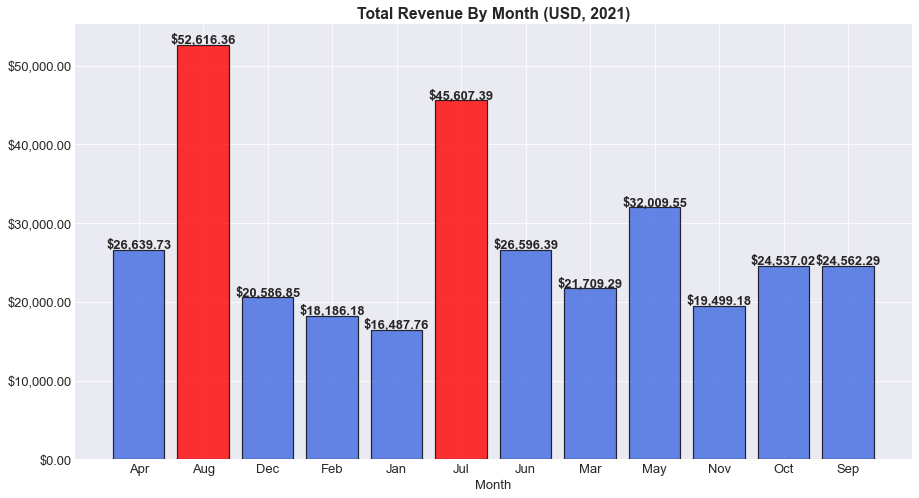

In [107]:
fig, ax = plt.subplots(figsize=(15, 8))

# Filter for 2021, group by the month and add up the revenue for item purchased
data = bakery[bakery['year'] == 2021].groupby('month')['total_spent_on_quantity'].sum()

# Plot
color_map = ['royalblue' for i in range(12)]
color_map[1] = color_map[5] = 'red'
ax.bar(data.index, data, color=color_map, lw=1.2, alpha=0.8, edgecolor='black')
ax.set_xlabel('Month')
ax.set_title('Total Revenue By Month (USD, 2021)')
for i in data.index:
    ax.annotate(f'${data[i]:,.02f}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)));

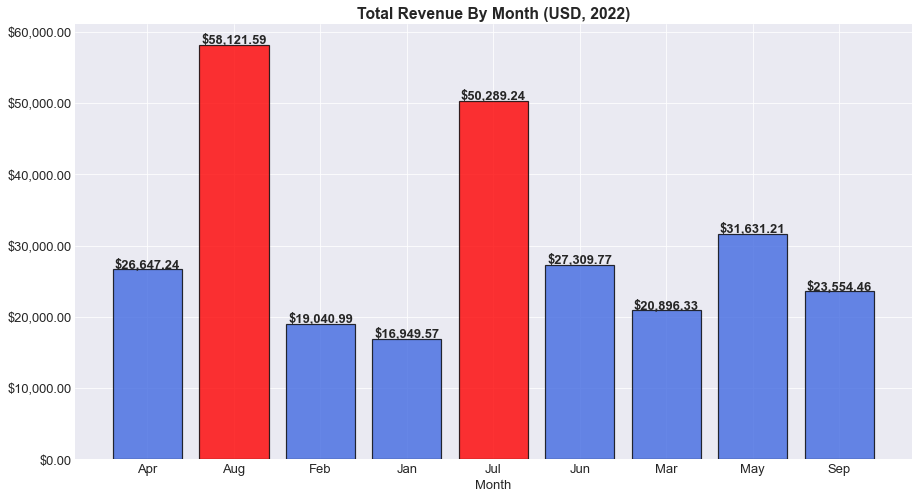

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))

# Do the same thing as before, but this time filtering for 2022
data = bakery[bakery['year'] == 2022].groupby('month')['total_spent_on_quantity'].sum()

# Plot
color_map = ['royalblue' for i in range(9)]
color_map[1] = color_map[4] = 'red'
ax.bar(data.index, data, lw=1.2, color=color_map, alpha=0.8, edgecolor='black')
ax.set_xlabel('Month')
ax.set_title('Total Revenue By Month (USD, 2022)')
for i in data.index:
    ax.annotate(f'${data[i]:,.02f}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)));

Both of the plots above support the previous finding, that July and August are the months that generate the most revenue.

#### Which days of the week generate the most revenue?

Unlike the months, this data is complete and all days of the week are represented in the dataset. The aggregate will sum the total revenue for all time based on the day of the week.

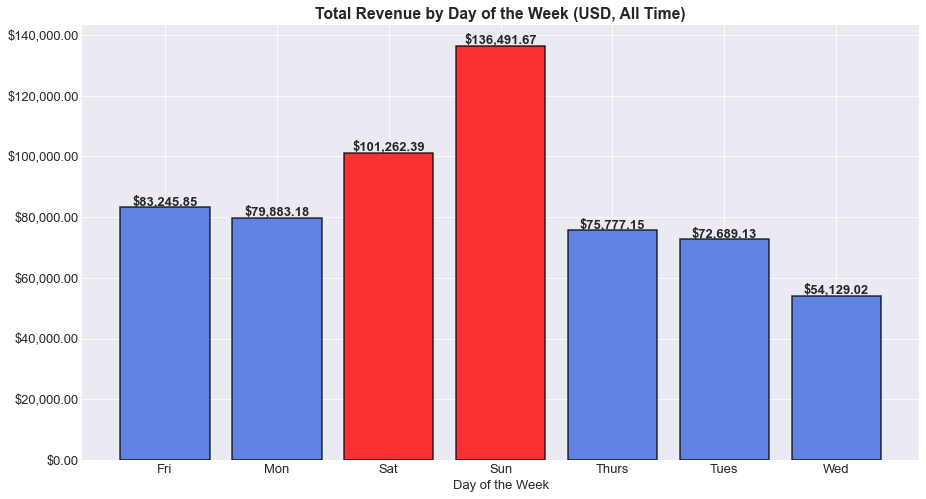

In [109]:
fig, ax = plt.subplots(figsize=(15, 8))

# Group by days of the week and sum all revenue
data = bakery.groupby('day_of_week')['total_spent_on_quantity'].sum()

color_map = ['royalblue' for i in range(7)]
color_map[2] = color_map[3] = 'red'
ax.bar(x=data.index, height=data, color=color_map, lw=1.5, alpha=0.8, edgecolor='black')
ax.set_xlabel('Day of the Week')
ax.set_title('Total Revenue by Day of the Week (USD, All Time)')
for i in data.index:
    ax.annotate(f'${data[i]:,.02f}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)));


It appears that the days that generate most revenue are the weekends, Saturdays and Sundays.

#### What products sell the most?

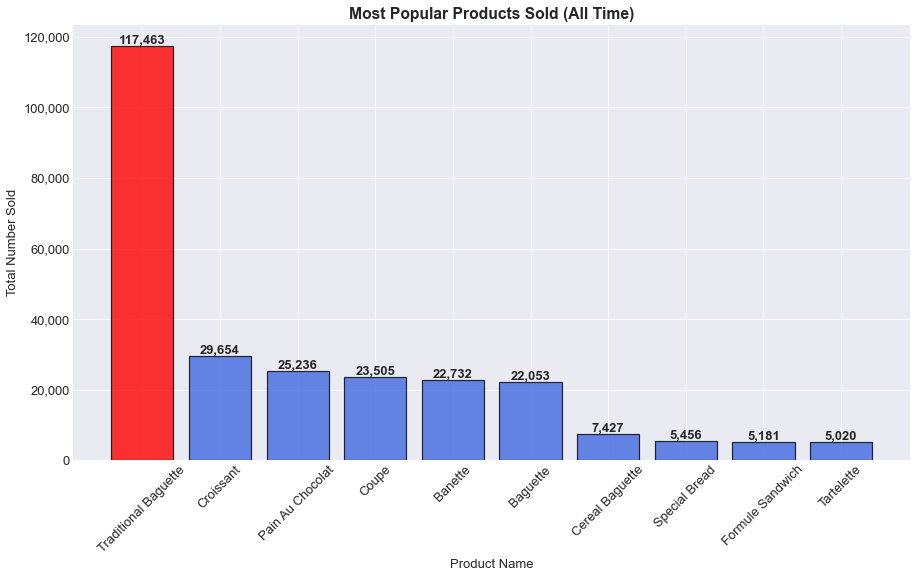

In [110]:
fig, ax = plt.subplots(figsize=(15, 8))

# Group by the article being sold, and add up all the quantities of that article sold
data = bakery.groupby('article')['Quantity'].sum().sort_values(ascending=False)[:10]

color_map = ['royalblue' for i in range(10)]
color_map[0] = 'red'
ax.bar(data.index, data, color=color_map, lw=1.2, edgecolor='black', alpha=0.8)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Number Sold')
ax.set_title('Most Popular Products Sold (All Time)')
for i in data.index:
    ax.annotate(f'{data[i]:,}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)));

The most popular product, beating out the next highest-selling product by almost 90,000 units, is the traditional baguette.

The next two highest selling products are croissants, and pain au chocolat.

## Inferential Analysis
---

#### Is there a significant difference in daily revenue during different months of 2021?

*Side note*: I'm only using one year because the months for 2022 are incomplete. There is no data past September for 2022.

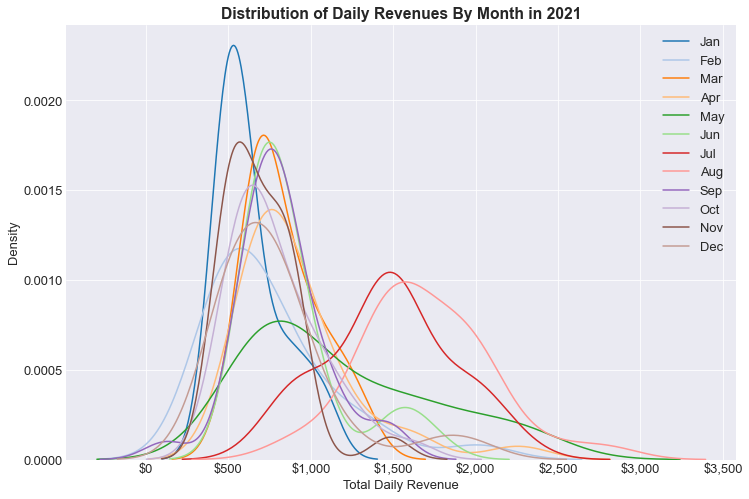

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))
color_map = sns.color_palette('tab20')

# Get a list of all months
MONTHS = bakery['month'].unique()
YEAR_FILTER_2021 = bakery['year'] == 2021

# Separate into different dataframes for each month, group by date, and calculate the total revenue for that day
for i, month in enumerate(MONTHS):
    MONTH_FILTER = bakery['month'] == month
    data = bakery.loc[MONTH_FILTER & YEAR_FILTER_2021].groupby('date')['total_spent_on_quantity'].sum()
    sns.kdeplot(data=data, label=month, color=color_map[i])
ax.legend()
ax.set_title('Distribution of Daily Revenues By Month in 2021');
ax.set_xlabel('Total Daily Revenue')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)));

Since we are comparing the differences in distributions of daily revenue across multiple months, we will be performing a multi-sample hypothesis test. However, we must first determine whether or not the distributions are normal. Most do not look to be normal from the graph above, but we will test it as well. To do that, we will conduct a Shapiro-Wilk test on each individual distribution.

$H_0$: The data is normally distributed.

$H_a$: The data is not normally distributed.

$\alpha = 0.05$

In [112]:
alpha = 0.05

for month in MONTHS:
    MONTH_FILTER = bakery['month'] == month
    data = bakery.loc[MONTH_FILTER & YEAR_FILTER_2021].groupby('date')['total_spent_on_quantity'].sum()

    _, p_val = stats.shapiro(data)

    if p_val < alpha:
        print(f"The distribution for '{month}' is probably not normal.")
    else:
        continue

The distribution for 'Jan' is probably not normal.
The distribution for 'Feb' is probably not normal.
The distribution for 'Apr' is probably not normal.
The distribution for 'May' is probably not normal.
The distribution for 'Jun' is probably not normal.
The distribution for 'Sep' is probably not normal.
The distribution for 'Oct' is probably not normal.
The distribution for 'Nov' is probably not normal.
The distribution for 'Dec' is probably not normal.


As expected, the daily revenue for most months are not normally distributed. Therefore, we will use a non-parametric multi-sample hypothesis test, the Kruskal-Wallis test, to determine if there is a significant difference in the medians of each month. We will conduct this test with a 95% confidence level, so our $\alpha$ value will be set to 0.05.

*Hypotheses*:

$H_0$: The median daily revenue of all 12 months are the same.

$H_a$: The median daily revenue of all 12 months are *not* the same.

$\alpha=0.05$

In [113]:
month_data = []
for month in MONTHS:
    MONTH_FILTER = bakery['month'] == month
    data = bakery.loc[MONTH_FILTER & YEAR_FILTER_2021].groupby('date')['total_spent_on_quantity'].sum()

    month_data.append(data)

In [114]:
def reject_or_not(p_value, alpha=0.05):
    if p_value < alpha:
        print(f'{p_value} < {alpha}')
        print("Reject the null hypothesis.")
    else:
        print(f'{p_value} > {alpha}')
        print("Fail to reject the null hypothesis.")

In [115]:
# Conduct the Kruskal-Wallis test
_, p_val = stats.kruskal(*month_data)

reject_or_not(p_val, alpha)

7.453384215992901e-25 < 0.05
Reject the null hypothesis.


Our p-value is very small, and thus there is sufficient evidence to reject the null hypothesis and support the alternative. This means that it is reasonable to believe at least one of the median daily revenues out of the 12 months is statistically different from the others.

#### Is there a significant difference in daily revenue during different days of the week?

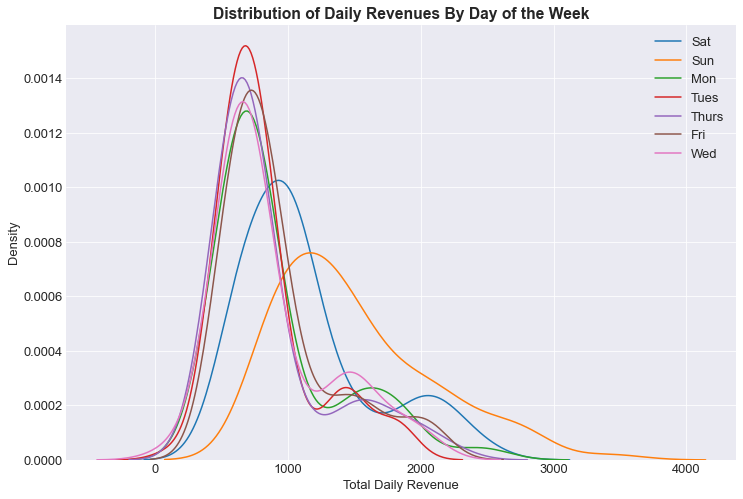

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))
color_map = sns.color_palette('tab10')

# Get a list of days of the week
DAYS = bakery['day_of_week'].unique()

# Separate into different dataframes for each month, group by daily revenue
for i, day in enumerate(DAYS):
    DAY_FILTER = bakery['day_of_week'] == day
    data = bakery.loc[DAY_FILTER].groupby('date')['total_spent_on_quantity'].sum()
    sns.kdeplot(data=data, label=day, color=color_map[i])
ax.legend()
ax.set_title('Distribution of Daily Revenues By Day of the Week');
ax.set_xlabel('Total Daily Revenue');

Similarly to the last question, for this question we will perform a multi-sample hypothesis test. This means we must check the normality of each distribution again.

In [117]:
day_data = []
for day in DAYS:
    DAY_FILTER = bakery['day_of_week'] == day
    data = bakery.loc[DAY_FILTER].groupby('date')['total_spent_on_quantity'].sum()
    day_data.append(data)
    
    _, p_val = stats.shapiro(data)

    if p_val < alpha:
        print(f"The distribution for '{day}' is not normal.")
    else:
        continue

The distribution for 'Sat' is not normal.
The distribution for 'Sun' is not normal.
The distribution for 'Mon' is not normal.
The distribution for 'Tues' is not normal.
The distribution for 'Thurs' is not normal.
The distribution for 'Fri' is not normal.
The distribution for 'Wed' is not normal.


Each day of the week's distribution are not normal according to the Shapiro-Wilk test, and thus we cannot use a parametric test for this either. Thus, we will conduct a Kruskal-Wallis test again.

*Hypotheses*:

$H_0$: The median daily revenue of all 7 days of the week are the same.

$H_a$: The median daily revenue of all 7 days of the week are *not* the same.

$\alpha=0.05$

In [118]:
# Conduct the Kruskal-Wallis test
_, p_val = stats.kruskal(*day_data)

reject_or_not(p_val, alpha)

1.839032239233342e-26 < 0.05
Reject the null hypothesis.


Since our p-value is smaller than our significance level of 0.05, there is sufficient evidence to reject the null hypothesis and support the alternative. This means that it is reasonable to believe at least one of the median daily revenues out of the 7 days of the week is statistically different from the others.

#### Days of the Week Part 2: Is the daily revenue on weekends greater than the daily revenue on weekdays?

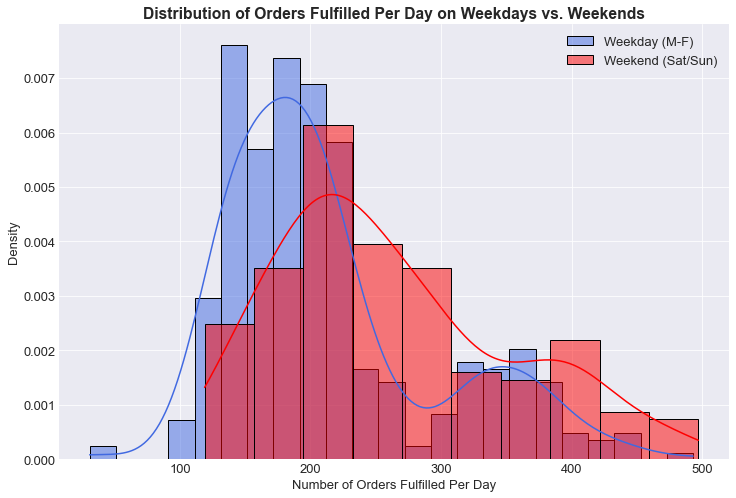

In [119]:
WEEKDAY = bakery['day_of_week'].isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
WEEKEND = bakery['day_of_week'].isin(['Sat', 'Sun'])

weekday = bakery.loc[WEEKDAY].groupby('date')['ticket_number'].nunique()
weekend = bakery.loc[WEEKEND].groupby('date')['ticket_number'].nunique()

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=weekday, label='Weekday (M-F)', ax=ax, kde=True, stat='density', color='royalblue')
sns.histplot(data=weekend, label='Weekend (Sat/Sun)', ax=ax,  kde=True, stat='density', color='red')
ax.legend()
ax.set_title('Distribution of Orders Fulfilled Per Day on Weekdays vs. Weekends')
ax.set_xlabel('Number of Orders Fulfilled Per Day');

For both of these groups as well, it is imperative to check if the distribution is normal before we conduct another hypothesis test. We will perform the Shapiro-Wilk test once again on each distribution.

In [120]:
def check_normality(data, alpha=0.05):
    _, p_value = stats.shapiro(data)

    if p_value < alpha:
        print("Reject that the distribution is normal")
    else:
        print("The distribution is normal.")

In [121]:
# Check the normality of the weekend and weekday distributions
check_normality(weekend)
check_normality(weekday)

Reject that the distribution is normal
Reject that the distribution is normal


Neither distribution is normal, and thus we must use a parametric test once again. The test that we will use is a one-tailed, two-sample non-parametric test: The Mann-Whitney U test. We will perform this test, as usual, with a 95% significance level.

*Hypotheses*:

$H_0$: The distribution of daily revenue on weekdays is the same as the distribution of daily revenue on weekends.

$H_a$: The distribution of daily revenue on weekends is *greater than* the distribution of daily revenue on weekdays.

$\alpha=0.05$

In [122]:
_, p_val = stats.mannwhitneyu(weekend, weekday, alternative='greater')

reject_or_not(p_val)

4.163131427211162e-13 < 0.05
Reject the null hypothesis.


Because our p-value is much smaller than our significance level of 0.05, there is sufficient evidence to reject the null hypothesis that the distributions of daily revenue on weekends and weekdays are identical. We can support the alternative hypothesis that the distribution of daily revenue on the weekends is greater than on weekdays.

#### Is there a significant difference in the average frequency of orders *before* 1:00pm to orders *after* 1:00pm?

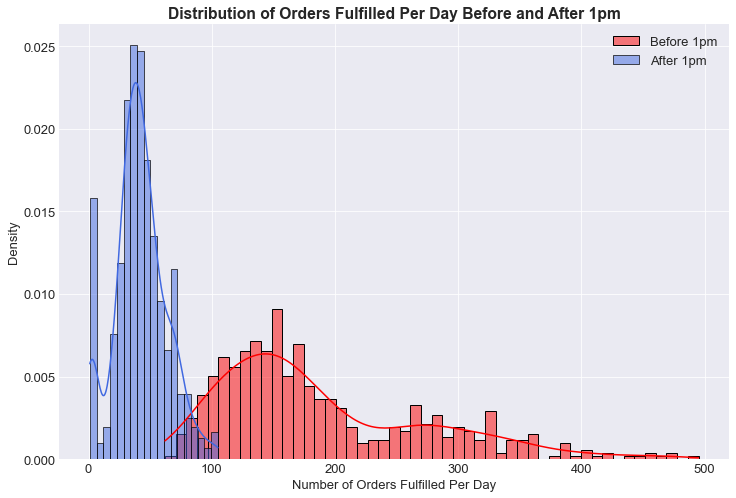

In [123]:
BEFORE_1PM = bakery['hour'] < 13

fig, ax = plt.subplots(figsize=(12, 8))

before_1pm = bakery.loc[BEFORE_1PM].groupby('date')['ticket_number'].nunique()
after_1pm = bakery.loc[~BEFORE_1PM].groupby('date')['ticket_number'].nunique()

sns.histplot(data=before_1pm, label='Before 1pm', ax=ax, kde=True, stat='density', color='red', bins=50)
sns.histplot(data=after_1pm, label='After 1pm', ax=ax,  kde=True, stat='density', color='royalblue')
ax.legend()
ax.set_title('Distribution of Orders Fulfilled Per Day Before and After 1pm')
ax.set_xlabel('Number of Orders Fulfilled Per Day');

The distributions above do not look normal at all, as they have spikes or long tails. However, by the Central Limit Theorem, we can randomly sample both of these distributions with a large enough sample size, take the distribution of many sample means, and the distribution will be approximately normal. This means that we can normalize these distributions and perform a parametric test to answer this question.

In [124]:
# The CLT assumes that the sample size is less than 10% of the original dataset, and a sample size >= 30 is sufficiently large
# Therefore, the original dataset must contain at least 300 observations
print(len(before_1pm), len(after_1pm))

598 554


The original datasets are large enough to justify a sufficiently large sample size. We can now apply the CLT.

Let n = 40. Sample both distributions and take the means of those samples, many, many times. Save to new variables.

In [125]:
n = 40
before_1pm_sample_means = []
after_1pm_sample_means = []

for i in range(1000):
    # Sample each distribution and calculate their means
    xbar1 = before_1pm.sample(n=n).mean()
    xbar2 = after_1pm.sample(n=n).mean()

    # Append sample means to new lists
    before_1pm_sample_means.append(xbar1)
    after_1pm_sample_means.append(xbar2)

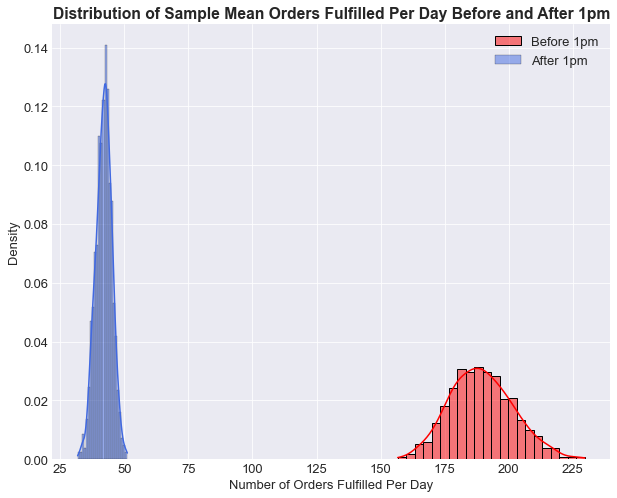

In [126]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=before_1pm_sample_means, label='Before 1pm', ax=ax, kde=True, stat='density', color='red')
sns.histplot(data=after_1pm_sample_means, label='After 1pm', ax=ax,  kde=True, stat='density', color='royalblue')
ax.legend()
ax.set_title('Distribution of Sample Mean Orders Fulfilled Per Day Before and After 1pm')
ax.set_xlabel('Number of Orders Fulfilled Per Day');

We can confirm that the distributions are now normal using the Shapiro-Wilk test.

In [127]:
check_normality(before_1pm_sample_means)
check_normality(after_1pm_sample_means)

Reject that the distribution is normal
The distribution is normal.


Now that we've normalized our data, we can now use a parametric test to compare the means of these two distributions. Because the two groups are measuring the order frequency of the same bakery before and after a certain point, the two groups are dependent. Thus, we will use a two-tailed, two-sample paired T-test for the hypothesis test. As always, we will use a significance level of 95%.

*Hypotheses*:

$H_0$: The average frequency of orders before 1pm is *not* different from the average frequency of orders after 1pm.

$H_a$: The average frequency of orders before 1pm *is* different from the average frequency of orders after 1pm.

$\alpha = 0.05$

In [129]:
_, p_value = stats.ttest_rel(before_1pm_sample_means, after_1pm_sample_means)

reject_or_not(p_value)

0.0 < 0.05
Reject the null hypothesis.


The p-value for this paired two-sample t-test is so small that Python just truncates it to 0. Therefore, there is sufficient evidence to support the alternative hypothesis, that the average frequency of orders before 1pm is significantly different from the average frequency of orders after 1pm.